Najpierw pobierzmy niezbędne biblioteki.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(3)
X = 3 * np.random.rand(400, 1)
y = 2 + 4 * X + np.random.randn(400, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
X_train_new = np.c_[np.ones((X_train.shape[0], 1)), X_train]



In [3]:
def change_learning_rate(t, t0, t1):
    return t0 / (t + t1)

In [4]:
def cost_function(X_sample,
                  y_sample,
                  theta):
    # Najpierw dokonujemy predykcji, korzystając z dostarczonych próbek
    # zawartych w X_sample oraz współczynników zawartych w theta.
    hyp = X_sample.dot(theta)
    # Teraz wyliczamy wartość funkcji kosztu, porównując predykcję
    # z rzeczywistymi wartościami, które model powinien nauczyć się
    # odwzorowywać.
    cost = ((hyp - y_sample).T.dot(hyp - y_sample))
    cost/=2
    return cost[0]

In [5]:
def mini_batch(X, y, batch_size):
    set_of_batches = []
    # Zestawmy ze sobą zarówno argumenty jak i wartości funkcji, ponieważ
    # nie możemy ich zgubić podczas losowania. Oddzielne losowanie dla argumentów
    # i oddzielne dla wartości funkcji jest błędem.
    data = np.hstack((X, y))
    # Wymieszajmy dane (razem argumenty z wartościami)
    np.random.shuffle(data)
    # Określmy liczbę batchy. Niewykluczone, że ostatni batch będzie miał mniej
    # elementów niż pozostałe.
    number_of_batches = data.shape[0] // batch_size
    i = 0
    
    for i in range(number_of_batches + 1):
        # Weźmy kolejno batch_size elementów z tablicy data
        batch = data[i * batch_size:(i + 1) * batch_size, :]
        # Rozdzielmy dane na argumenty i wartości.
        X_batch = batch[:, :-1]
        y_batch = batch[:, -1].reshape((-1, 1))
        # Nowo utworzony batch dodajmy do przygotowanej wcześniej listy
        set_of_batches.append((X_batch, y_batch))
    
    # W przypadku ostatniego batcha, tzn. jeśli reszta z dzielenia liczby
    # próbek przez rozmiar batcha jest niezerowa
    if ((data.shape[0] % batch_size) != 0):
        #print(f'Ostatni batch będzie miał inną liczbę elementów')
        batch = data[i * batch_size:data.shape[0]]
        X_batch = batch[:, :-1]
        y_batch = batch[:, -1].reshape((-1, 1))
        set_of_batches.append((X_batch, y_batch))

    return set_of_batches

\textbf{Zadanie domowe}: zmodyfikuj funkcję stochastic_gradient_descent() tak, by parametry aktualizowane były nie co jedną próbkę, ale co jeden batch przygotowany w funkcji mini_batch(). Zaproponuj sposób modyfikacji współczynnika uczenia.

In [6]:
def batch_stochastic_gradient_descent(X_train,
                                y_train,
                                X_test,
                                y_test,
                                epochs,
                                batch_size):
  
    theta = np.random.randn(1,X_train.shape[1])
    error_values = []
    length = len(X_train)/batch_size
    batches=mini_batch(X, y, batch_size)
    for epoch in range(epochs):
        i=1
        for  batch in batches:
          
            X_mini,y_mini=batch
            
            gradient =  X_mini.T.dot(X_mini.dot(theta) - y_mini)
            # Dokonajmy aktualizacji współczynnika uczenia
            eta = change_learning_rate(epoch*length*i, 3, 150)
            # Dokonajmy aktualizacji parametrów theta
            theta = theta - eta * gradient
            error = cost_function(X_mini, y_mini, theta)
            print(f'Obecny blad wynosi: {error}')
            error_values.append(error)
            i+=1
            
  
    # Dokonajmy predykcji wyuczonego modelu na zbiorze testowym
    sgd_prediction = theta[0,0] + theta[0,1] * X_test
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_test, sgd_prediction, color='blue')
    
    print(f'Wspolczynniki: {theta}')
    print(f'Blad sredniokwadratowy: {mean_squared_error(y_test, sgd_prediction)}')
    print(f'Wspolczynnik determinacji: {r2_score(y_test, sgd_prediction)}')

    return sgd_prediction, error_values





si: [23.62209453 23.62209453]
Obecny blad wynosi: [18.33045183 18.33045183]
Obecny blad wynosi: [0. 0.]
Obecny blad wynosi: [28.67381964 28.67381964]
Obecny blad wynosi: [31.69213713 31.69213713]
Obecny blad wynosi: [20.57714915 20.57714915]
Obecny blad wynosi: [18.08921564 18.08921564]
Obecny blad wynosi: [26.12537615 26.12537615]
Obecny blad wynosi: [25.11771556 25.11771556]
Obecny blad wynosi: [24.13867254 24.13867254]
Obecny blad wynosi: [39.20085315 39.20085315]
Obecny blad wynosi: [20.03231486 20.03231486]
Obecny blad wynosi: [30.02456504 30.02456504]
Obecny blad wynosi: [21.75221162 21.75221162]
Obecny blad wynosi: [33.32249785 33.32249785]
Obecny blad wynosi: [29.00255841 29.00255841]
Obecny blad wynosi: [30.96194456 30.96194456]
Obecny blad wynosi: [23.62192425 23.62192425]
Obecny blad wynosi: [18.33035048 18.33035048]
Obecny blad wynosi: [0. 0.]
Obecny blad wynosi: [28.67393543 28.67393543]
Obecny blad wynosi: [31.69208053 31.69208053]
Obecny blad wynosi: [20.57728881 20.5772

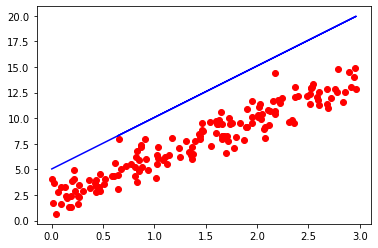

In [7]:
predictions, errors = batch_stochastic_gradient_descent(X_train_new,
                                                  y_train,
                                                  X_test,
                                                  y_test,
                                                  80,25)